In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
import scipy
from scipy import stats
%matplotlib inline
sns.set(color_codes=True)

credit_data=pd.read_csv('TrainingData.csv')
n=credit_data.shape[0]
credit_data.index=range(1,n+1)
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
3,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
4,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
5,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 1 to 3973
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    3973 non-null   int64  
 1   V1      3973 non-null   float64
 2   V2      3973 non-null   float64
 3   V3      3973 non-null   float64
 4   V4      3973 non-null   float64
 5   V5      3973 non-null   float64
 6   V6      3973 non-null   float64
 7   V7      3973 non-null   float64
 8   V8      3973 non-null   float64
 9   V9      3973 non-null   float64
 10  V10     3973 non-null   float64
 11  V11     3973 non-null   float64
 12  V12     3973 non-null   float64
 13  V13     3973 non-null   float64
 14  V14     3973 non-null   float64
 15  V15     3973 non-null   float64
 16  V16     3973 non-null   float64
 17  V17     3973 non-null   float64
 18  V18     3973 non-null   float64
 19  V19     3973 non-null   float64
 20  V20     3973 non-null   float64
 21  V21     3973 non-null   float64
 22  

In [4]:
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,...,3973.000000,3973.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000
mean,1638.724138,-0.333723,0.308691,0.837062,0.013144,-0.029177,0.052836,0.146895,-0.071352,0.055778,...,0.010465,-0.082885,-0.058484,0.029106,0.095278,-0.012623,0.044638,0.002639,65.000101,0.000504
std,1016.577498,1.351976,1.180436,0.981057,1.418751,1.207632,1.286610,1.090769,1.294647,0.919087,...,0.855829,0.635482,0.391158,0.603965,0.405989,0.503818,0.352752,0.254136,213.688183,0.022437
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-11.164794,-23.632502,-3.336805,...,-11.273890,-5.707801,-7.996811,-2.162523,-2.322906,-1.338556,-5.336289,-2.909294,0.000000,0.000000
25%,750.000000,-1.030747,-0.155734,0.287224,-0.908469,-0.573740,-0.735876,-0.278697,-0.205430,-0.473894,...,-0.211812,-0.512434,-0.210615,-0.338940,-0.141891,-0.339998,-0.041461,-0.020983,2.265000,0.000000
50%,1526.000000,-0.451819,0.409641,0.884503,0.099497,-0.089809,-0.209577,0.162196,0.028639,0.032286,...,-0.053234,-0.064435,-0.069939,0.100635,0.108219,-0.025647,0.033751,0.021264,12.990000,0.000000
75%,2526.000000,1.070572,0.921588,1.433851,0.982710,0.396675,0.449217,0.635055,0.298866,0.622704,...,0.102520,0.345346,0.062502,0.432692,0.361309,0.288406,0.205736,0.087058,54.990000,0.000000
max,3624.000000,1.685314,6.118940,4.017561,6.013346,10.658654,21.393069,34.303177,3.877662,6.450992,...,15.631453,4.393846,4.095021,1.215279,1.727063,3.463246,3.852046,4.157934,7712.430000,1.000000


In [6]:
print(credit_data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [7]:
credit_data.Time

1          0
2          0
3          1
4          1
5          2
        ... 
3969    3617
3970    3621
3971    3622
3972    3623
3973    3624
Name: Time, Length: 3973, dtype: int64

In [8]:
credit_data.groupby('Class').count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,3970,3970,3970,3970,3970,3970,3970,3970,3970,3970,...,3970,3970,3970,3970,3970,3970,3970,3970,3970,3970
1.0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [9]:
duplicate_data=credit_data.drop_duplicates(subset=None,keep='first',inplace=False)

print('Shape of Original dataset:',credit_data.shape)
print('Shape of dataset after dropping duplicates:',duplicate_data.shape)

Shape of Original dataset: (3973, 31)
Shape of dataset after dropping duplicates: (3941, 31)


Since, Shape of dataset after dropping duplicates is less, so there exists some duplicates in the given dataset, so, we will drop those for further evaluation.

In [10]:
credit_data=duplicate_data
credit_data.shape

(3941, 31)

In [11]:
credit_data.groupby('Class').count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,3938,3938,3938,3938,3938,3938,3938,3938,3938,3938,...,3938,3938,3938,3938,3938,3938,3938,3938,3938,3938
1.0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


# Data Visualisation

Text(0.5, 1.0, 'Amount v/s Time')

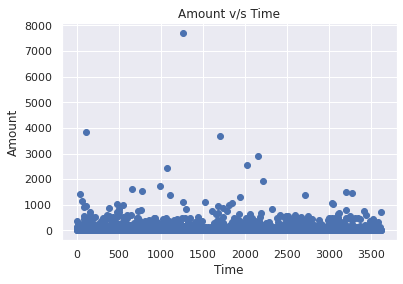

In [12]:
plt.scatter(credit_data['Time'],credit_data['Amount'])
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Amount v/s Time')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


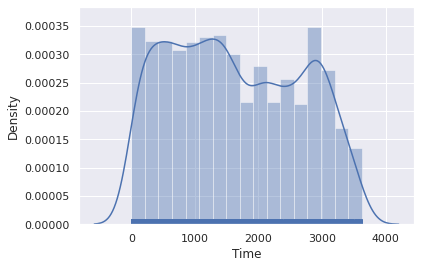

In [13]:
sns.distplot(credit_data['Time'],rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


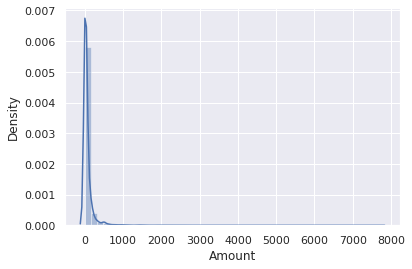

In [14]:
sns.distplot(credit_data['Amount'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

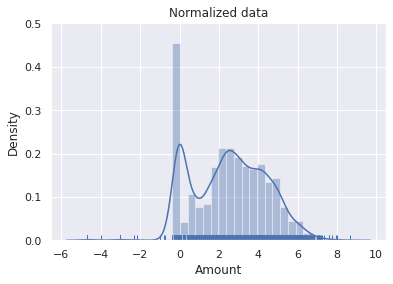

In [15]:
i=credit_data.Amount>0
Original_Amount=credit_data.Amount.loc[i]
Normalized_Amount=pd.Series(stats.boxcox(Original_Amount)[0],name='Amount',index=Original_Amount.index)

sns.distplot(Normalized_Amount,rug=True)
plt.title('Normalized data')

In [16]:
print('Original positive amounts:\n',Original_Amount.head())
print('Min:',Original_Amount.min())
print('Max:',Original_Amount.max())
print('-'*25)
print('Normalized positive amounts:\n',Normalized_Amount.head())
print('Min:',Normalized_Amount.min())
print('Max:',Normalized_Amount.max())

Original positive amounts:
 1    149.62
2      2.69
3    378.66
4    123.50
5     69.99
Name: Amount, dtype: float64
Min: 0.01
Max: 7712.43
-------------------------
Normalized positive amounts:
 1    4.912400
2    0.985766
3    5.802483
4    4.727691
5    4.179353
Name: Amount, dtype: float64
Min: -4.688118217478541
Max: 8.647973242025971


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


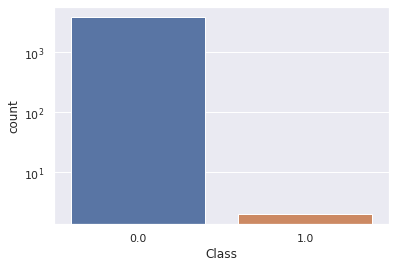

In [17]:
pl=sns.countplot(credit_data['Class'])
pl.set_yscale('log')

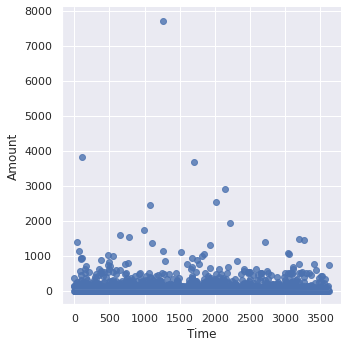

In [18]:
sns.lmplot(x='Time',y='Amount',data=credit_data)

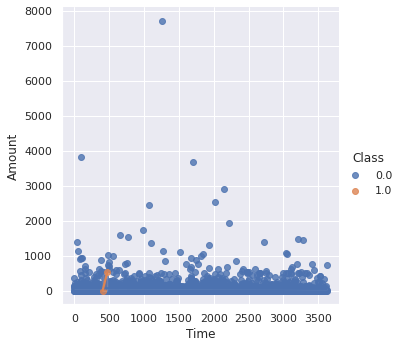

In [19]:
sns.lmplot(x='Time',y='Amount',hue='Class',data=credit_data)

This shows that each of transaction amount that is associated with fraud is less as compared to normal transaction amount. 

In [20]:
features=credit_data.iloc[:,1:29]
print(features)

            V1        V2        V3        V4        V5        V6        V7  \
1    -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
2     1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
3    -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
4    -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
5    -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
...        ...       ...       ...       ...       ...       ...       ...   
3969  1.134592  0.252051  0.488592  0.799826 -0.264819 -0.369918 -0.243365   
3970 -1.338671  1.080974  1.291196  0.719258  0.101320  0.053896  0.001297   
3971 -0.339728 -2.417449  0.975517  2.537995 -1.720361  0.863005  0.032965   
3972 -0.368639  0.947432  1.707755  0.932092  0.292956  0.189100  0.499330   
3973 -0.663445  1.162921  1.508050  0.549405  0.231377 -0.106041  0.817977   

            V8        V9       V10  ...       V19       V20    

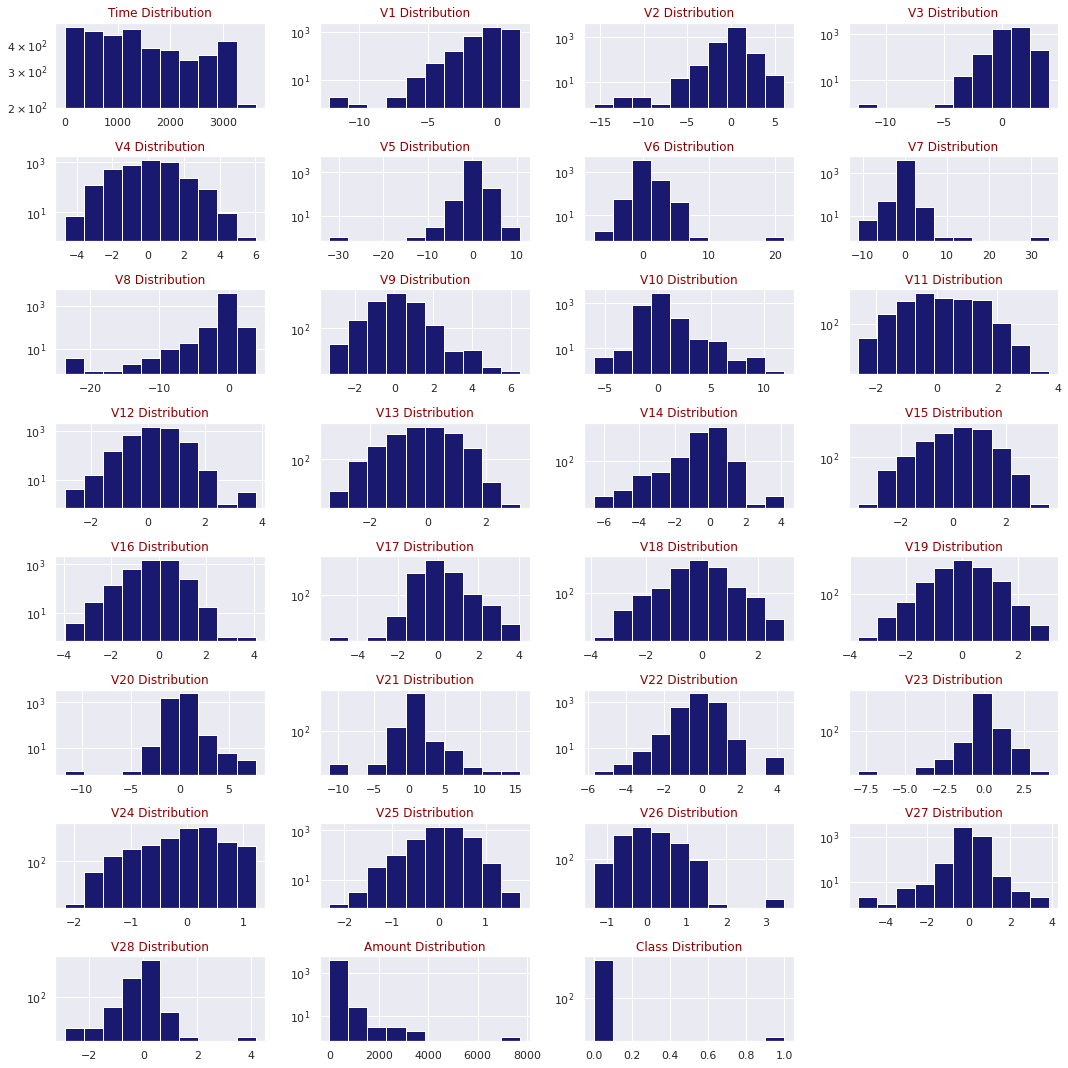

In [21]:
RP=plt.figure(figsize=(15,15))
for i, feature in enumerate(credit_data.columns):
    r=RP.add_subplot(8,4,i+1)
    credit_data[feature].hist(bins=10,ax=r,facecolor='midnightblue')
    r.set_title(feature+" Distribution",color='DarkRed')
    r.set_yscale('log')
RP.tight_layout()  
plt.show()

            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000 -0.032123  0.038248 -0.015516 -0.133490  0.049832 -0.019349   
V1     -0.032123  1.000000 -0.173102 -0.156023  0.144744 -0.098139 -0.050005   
V2      0.038248 -0.173102  1.000000  0.037713 -0.034473  0.129179 -0.065843   
V3     -0.015516 -0.156023  0.037713  1.000000  0.142695 -0.014167 -0.191195   
V4     -0.133490  0.144744 -0.034473  0.142695  1.000000 -0.154194  0.071616   
V5      0.049832 -0.098139  0.129179 -0.014167 -0.154194  1.000000  0.057245   
V6     -0.019349 -0.050005 -0.065843 -0.191195  0.071616  0.057245  1.000000   
V7      0.034665 -0.116008  0.079348 -0.062042 -0.054467 -0.203520  0.003185   
V8      0.006433  0.223647 -0.188886  0.085846  0.069915  0.119305 -0.006572   
V9      0.059877 -0.135891  0.066498  0.005902 -0.251144  0.027287 -0.016109   
V10    -0.104629 -0.122111  0.175255  0.062094  0.200126  0.004339  0.029415   
V11     0.038043  0.026162  0.052510 -0.

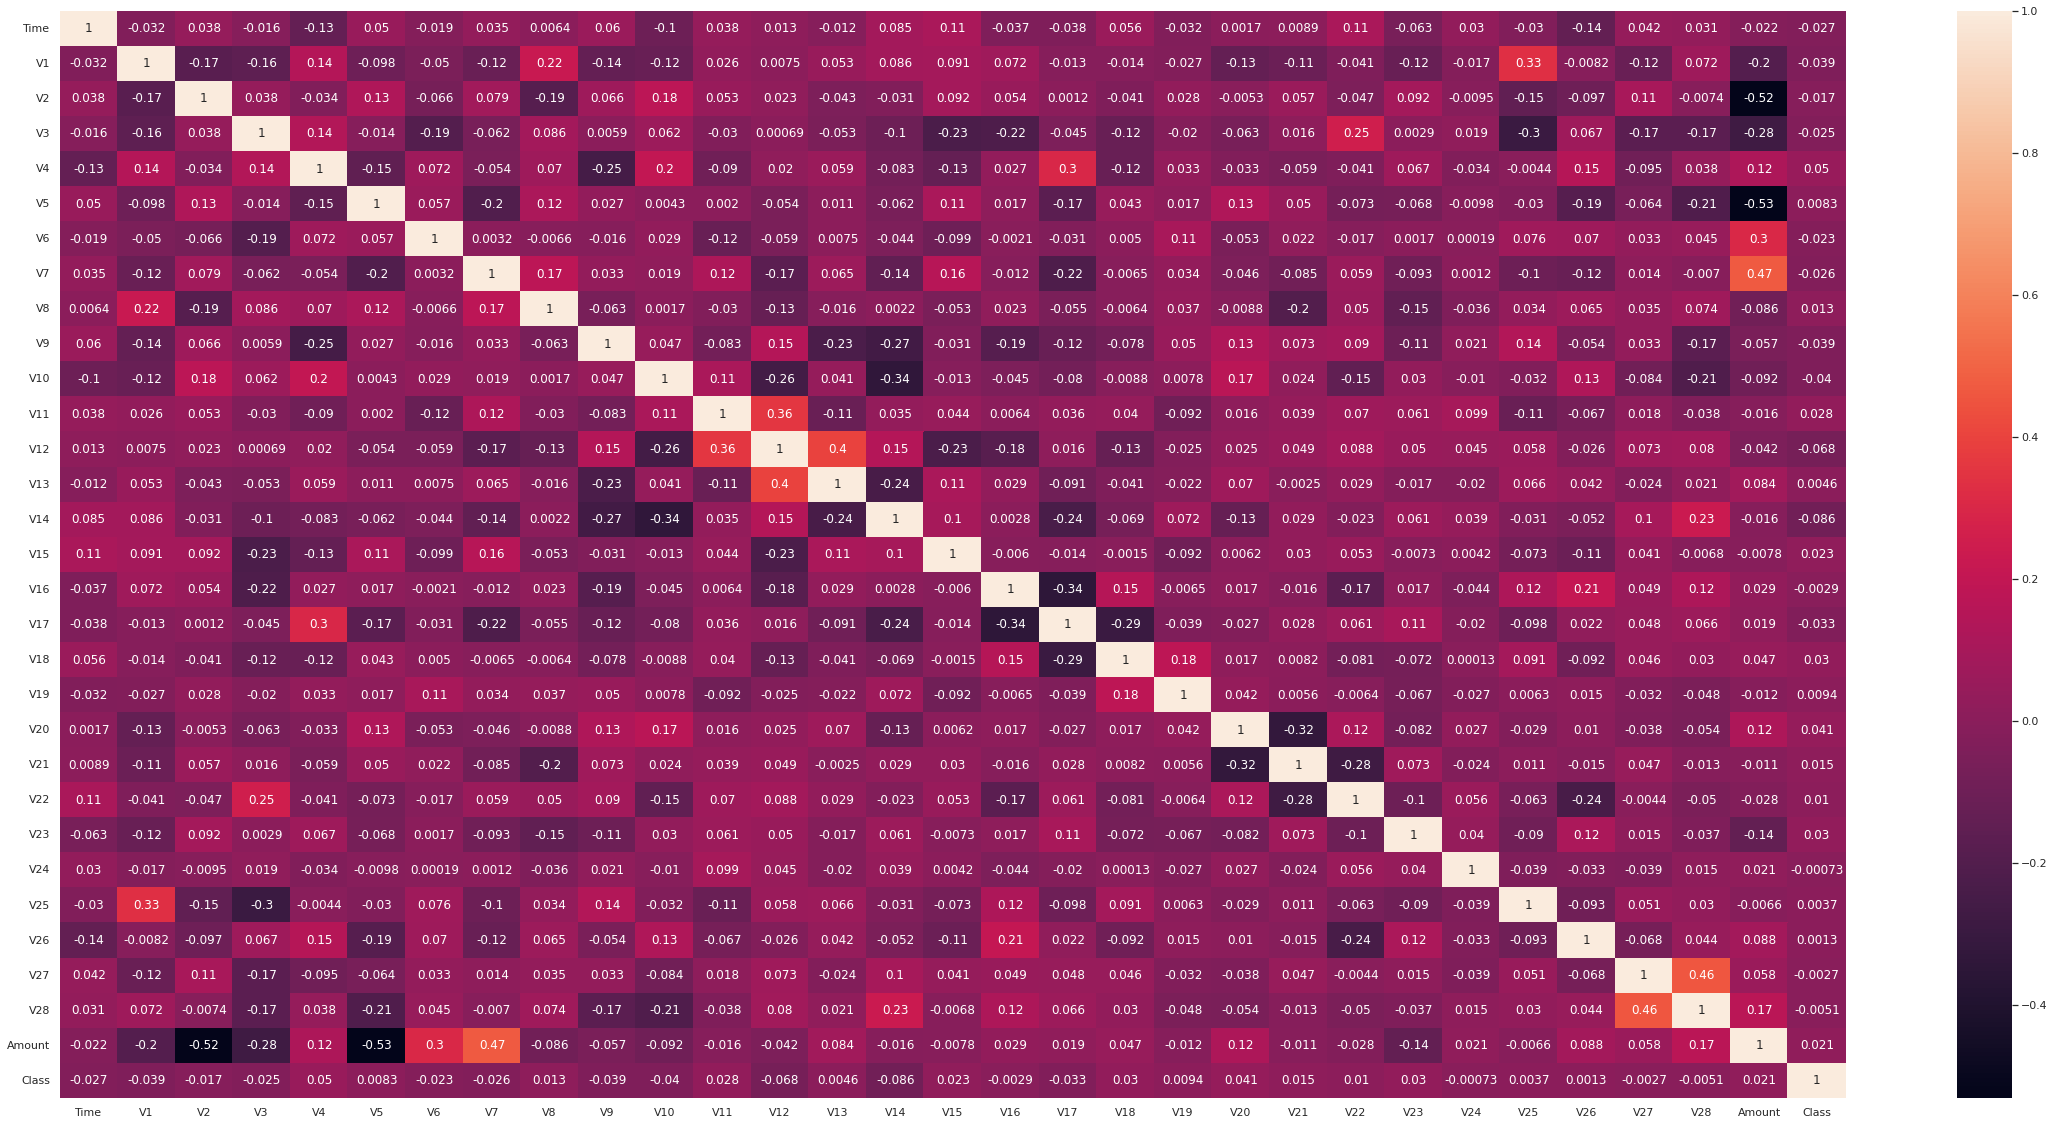

In [22]:
correlation_features=credit_data.corr()
print(correlation_features)
plt.figure(figsize=(40,20))
sns.heatmap(correlation_features,annot=True)

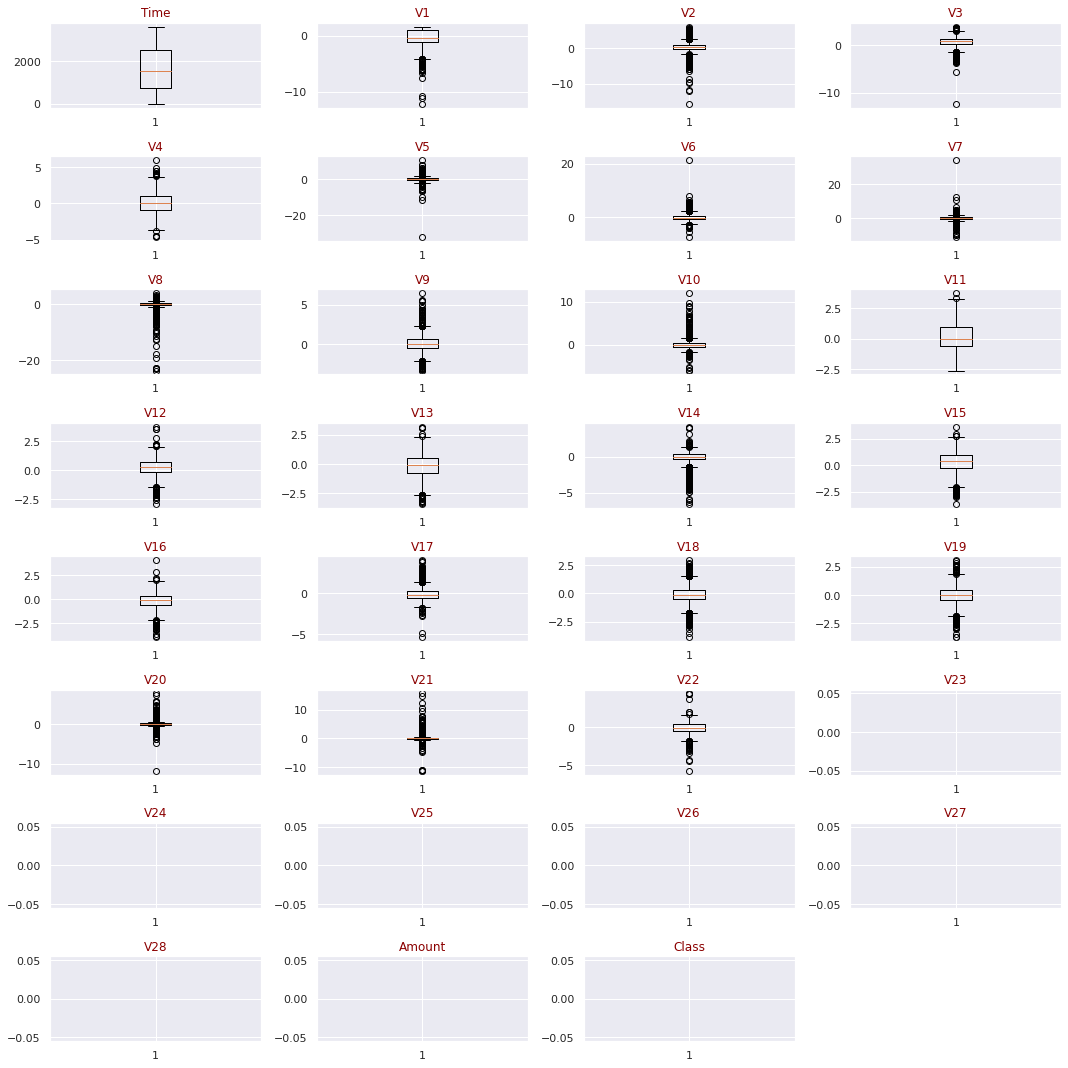

In [23]:
RP=plt.figure(figsize=(15,15))
for i, feature in enumerate(credit_data.columns):
    r=RP.add_subplot(8,4,i+1)
    plt.boxplot(credit_data[feature],data=credit_data)
    r.set_title(feature,color='DarkRed')
RP.tight_layout()  
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
  
from imblearn.over_sampling import SMOTE
  
from xgboost import XGBClassifier
from xgboost import Booster
from xgboost import DMatrix
  
from sklearn import metrics
  
from datetime import datetime

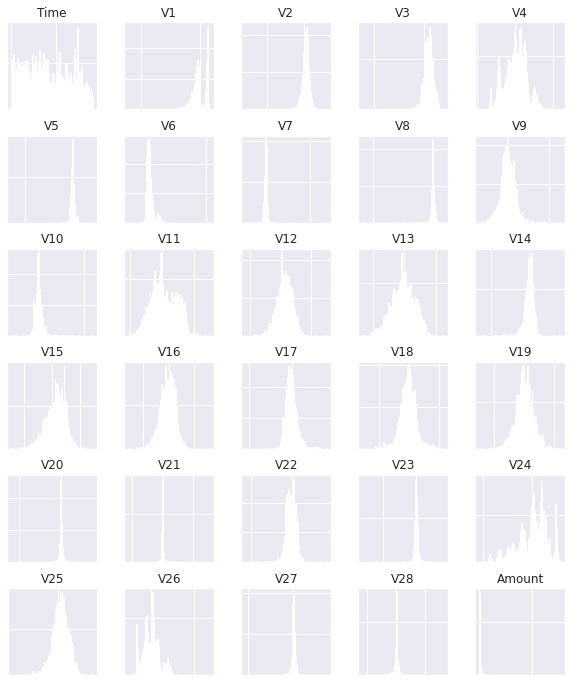

In [27]:
ax = credit_data.drop("Class", axis=1).hist(figsize=(10,12),bins=100)
# We hide the axes' labels to make the plot neater and more compact 
for axis in ax.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])

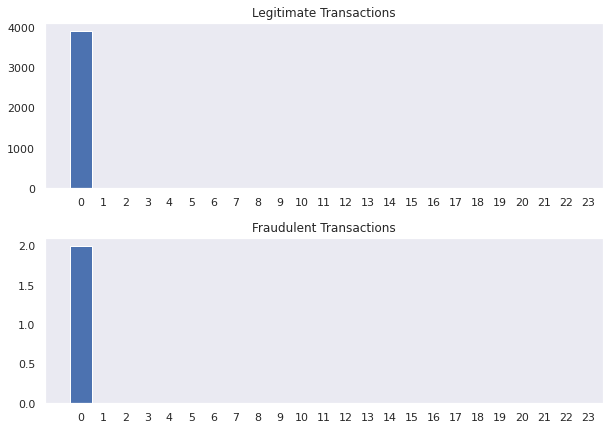

In [28]:
credit_data["Hour"] = credit_data["Time"].apply(datetime.fromtimestamp).dt.hour
fig, ax = plt.subplots(2, figsize=(10,7))
for a in ax:
    a.set_xticks(range(24))
credit_data.loc[credit_data["Class"] == 0]["Hour"].hist(bins=np.arange(24)-0.5, ax=ax[0], grid=False)
credit_data.loc[credit_data["Class"] == 1]["Hour"].hist(bins=np.arange(24)-0.5, ax=ax[1], grid=False)
ax[0].title.set_text("Legitimate Transactions")
ax[1].title.set_text("Fraudulent Transactions")
plt.subplots_adjust(hspace=0.3)